In [3]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 375.2 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 96.5 kB/s eta 0:00:00m eta 0:00:010:00:14m


In [4]:
!pip install pandas numpy 

In [6]:
!pip install scikit-posthocs

  Using cached scikit_posthocs-0.8.0-py3-none-any.whl.metadata (5.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 332.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 772.2 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
Using cached scikit_posthocs-0.8.0-py3-none-any.whl (32 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 995.6 kB/s eta 0:00:00eta 0:00:010:00:01m0m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.0 MB/s eta 0:00:001.0 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 869.7 kB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 888.2 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.0 MB/s eta 0:00:00m eta 0:00:010:00:010m
Using cached pyparsing-3.1.1-py3-none-any

In [8]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2369 sha256=16869e2690058394401659f793c36aa68149c8f6b3051dd249457d38e6367f04
  Stored in directory: /home/ki3ani/.cache/pip/wheels/9e/9e/4c/184e84f4ce918378a9ec9adafd1b6b73bea45f0a4a7855b6ce
Successfully built sklearn


In [11]:
!pip install scikit-learn

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 93.3 kB/s eta 0:00:00m eta 0:00:010:00:04
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [12]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import scipy.stats as stats
from scipy.stats import kruskal
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# Define the file paths for the datasets
file_paths = {
    'order_items': 'data/olist_order_items_dataset.csv',
    'products': 'data/olist_products_dataset.csv',
    'customers': 'data/olist_customers_dataset.csv',
    'order-reviews': 'data/olist_order_reviews_dataset.csv',
    'orders': 'data/olist_orders_dataset.csv',
    'order-payments': 'data/olist_order_payments_dataset.csv',

}

# Function to load datasets
def load_datasets(file_paths):
    data = {}
    for name, path in file_paths.items():
        data[name] = pd.read_csv(path)
    return data

# Load the datasets
loaded_data = load_datasets(file_paths)

# Accessing individual DataFrames
order_items_df = loaded_data['order_items']
products_df = loaded_data['products']
customers_df = loaded_data['customers']
order_reviews_df = loaded_data['order-reviews']
orders_df = loaded_data['orders']
order_payments_df = loaded_data['order-payments']

# Display basic info about the loaded datasets
for name, df in loaded_data.items():
    print(f"--- {name} ---")
    print(df.head())
    print(df.info())
    print("---------------")


--- order_items ---
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18  

In [16]:
# Data preprocessing and cleaning
for name, df in loaded_data.items():
    # Handle missing values
    if df.isnull().sum().any():
        numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
        df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
        object_columns = df.select_dtypes(include=['object']).columns
        df[object_columns] = df[object_columns].fillna(df[object_columns].mode().iloc[0])

    # Remove duplicates
    df.drop_duplicates(inplace=True)


# Outlier detection and removal using Z-score
for name, df in loaded_data.items():
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        df = df[(np.abs(zscore(df[col])) < 3)]

# Normalization
for name, df in loaded_data.items():
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Merge 'order_items' and 'orders' on 'order_id'
merged_df = pd.merge(loaded_data['order_items'], loaded_data['orders'], on='order_id')

# Merge the resulting DataFrame with 'customers' on 'customer_id'
final_df = pd.merge(merged_df, loaded_data['customers'], on='customer_id')


In [15]:
# Feature engineering
order_items_df['total_cost'] = order_items_df['price'] + order_items_df['freight_value']


# Encoding categorical variables
for name, df in loaded_data.items():
    object_columns = df.select_dtypes(include=['object']).columns
    for col in object_columns:
        df[col] = df[col].astype('category').cat.codes

# Merge 'order_items' and 'orders' on 'order_id'
merged_df = pd.merge(loaded_data['order_items'], loaded_data['orders'], on='order_id')

# Merge the resulting DataFrame with 'customers' on 'customer_id'
final_df = pd.merge(merged_df, loaded_data['customers'], on='customer_id')


# Define a threshold for the minimum number of purchases
min_product_purchases = 10
min_customer_purchases = 10

# Filter out products that have been bought less than min_product_purchases times
product_counts = final_df['product_id'].value_counts()
popular_products = product_counts[product_counts >= min_product_purchases].index
final_df = final_df[final_df['product_id'].isin(popular_products)]

# Filter out customers who have bought less than min_customer_purchases times
customer_counts = final_df['customer_unique_id'].value_counts()
active_customers = customer_counts[customer_counts >= min_customer_purchases].index
final_df = final_df[final_df['customer_unique_id'].isin(active_customers)]

# Create user-item matrix
user_item_matrix = final_df.pivot_table(index='customer_unique_id', columns='product_id', values='total_cost')

# Fill missing values with 0
user_item_matrix.fillna(0, inplace=True)

# Print the user-item matrix
print(user_item_matrix)


product_id             468       700       1633      3199      5158   \
customer_unique_id                                                     
2256                0.000000  0.000000  0.000000  0.000000  0.000000   
5673                0.000000  0.000000  0.000000  0.000000  0.000000   
17377               0.000000  0.000000  0.000000  0.000000  0.000000   
18876               0.000000  0.000000  0.000000  0.000000  0.000000   
36364               0.000000  0.000000  0.000000  0.000000  0.000000   
36943               0.000000  0.000000  0.000000  0.000000  0.000000   
51435               0.000000  0.000000  0.000000  0.000000  0.000000   
54797               0.000000  0.000000  0.000000  0.033532  0.000000   
57152               0.000000  0.000000  0.000000  0.000000  0.000000   
57495               0.000000  0.000000  0.000000  0.000000  0.000000   
69223               0.000000  0.000000  0.000000  0.000000  0.000000   
70677               0.000000  0.000000  0.083372  0.000000  0.00

In [17]:
# Fill missing values with 0
user_item_matrix.fillna(0, inplace=True)

# Print the user-item matrix
print(user_item_matrix)

# Print the first 5 rows of each DataFrame
for name, df in loaded_data.items():
    print(f"--- First 5 rows of {name} ---")
    print(df.head())
    print("\n")

# Print the summary statistics of each DataFrame
for name, df in loaded_data.items():
    print(f"--- Summary statistics of {name} ---")
    print(df.describe())
    print("\n")

# Print the number of missing values in each DataFrame
for name, df in loaded_data.items():
    print(f"--- Missing values in {name} ---")
    print(df.isnull().sum())
    print("\n")


product_id             468       700       1633      3199      5158   \
customer_unique_id                                                     
2256                0.000000  0.000000  0.000000  0.000000  0.000000   
5673                0.000000  0.000000  0.000000  0.000000  0.000000   
17377               0.000000  0.000000  0.000000  0.000000  0.000000   
18876               0.000000  0.000000  0.000000  0.000000  0.000000   
36364               0.000000  0.000000  0.000000  0.000000  0.000000   
36943               0.000000  0.000000  0.000000  0.000000  0.000000   
51435               0.000000  0.000000  0.000000  0.000000  0.000000   
54797               0.000000  0.000000  0.000000  0.033532  0.000000   
57152               0.000000  0.000000  0.000000  0.000000  0.000000   
57495               0.000000  0.000000  0.000000  0.000000  0.000000   
69223               0.000000  0.000000  0.000000  0.000000  0.000000   
70677               0.000000  0.000000  0.083372  0.000000  0.00

In [18]:
# Frequency: count the number of purchases for each product
product_frequency = final_df['product_id'].value_counts()

# Central tendency: calculate the mean and median total cost
mean_cost = final_df['total_cost'].mean()
median_cost = final_df['total_cost'].median()

# Distribution: calculate the standard deviation of the total cost
std_dev_cost = final_df['total_cost'].std()

# Relationship: calculate the correlation between total cost and product_id
# Note: this requires product_id to be a numeric type. If it's a categorical type, you'll need to convert it to numeric.
correlation = final_df['total_cost'].corr(final_df['product_id'])

print(f"Product Frequency:\n{product_frequency}\n")
print(f"Mean Total Cost: {mean_cost}")
print(f"Median Total Cost: {median_cost}")
print(f"Standard Deviation of Total Cost: {std_dev_cost}")
print(f"Correlation between Total Cost and Product ID: {correlation}")

Product Frequency:
product_id
22112    527
19742    488
8613     484
7364     392
7079     388
        ... 
28334      1
12122      1
1484       1
21105      1
6906       1
Name: count, Length: 32951, dtype: int64

Mean Total Cost: 0.042885993734036953
Median Total Cost: 0.03321956658707655
Standard Deviation of Total Cost: 0.03667099040088164
Correlation between Total Cost and Product ID: 0.010798755076964435


In [22]:
import random

# Select specific product_ids
product_ids = [1633, 27232, 6138]  # replace with your chosen product_ids

# Select the total cost data for these products
product1 = final_df[final_df['product_id'] == product_ids[0]]['total_cost']
product2 = final_df[final_df['product_id'] == product_ids[1]]['total_cost']
product3 = final_df[final_df['product_id'] == product_ids[2]]['total_cost']

# Perform ANOVA
f_val, p_val = stats.f_oneway(product1, product2, product3)
print(f"F-value: {f_val}")
print(f"P-value: {p_val}")

# Sample the dataframe
sample_size = min(len(product1), len(product2), len(product3))  # Set sample size to the smallest product data length

sampled_df = final_df.sample(n=sample_size, random_state=42)  # Change random_state if desired

# Create a contingency table based on the sampled data
contingency_table = pd.crosstab(sampled_df['product_id'], sampled_df['customer_unique_id'])

# Perform Chi-square test on the sampled data
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_val}")

# Correlation with price on sampled data
correlation_price = sampled_df['total_cost'].corr(sampled_df['price'])
print(f"Correlation with Price: {correlation_price}")

# Correlation with freight_value on sampled data
correlation_freight = sampled_df['total_cost'].corr(sampled_df['freight_value'])
print(f"Correlation with Freight Value: {correlation_freight}")

# Prepare data from sampled products
sampled_product_data = pd.concat([product1.sample(n=sample_size, random_state=42),
                                  product2.sample(n=sample_size, random_state=42),
                                  product3.sample(n=sample_size, random_state=42)])
sampled_groups = ['product1'] * sample_size + ['product2'] * sample_size + ['product3'] * sample_size
sampled_df = pd.DataFrame({'values': sampled_product_data, 'groups': sampled_groups})

# Perform Dunn's test on sampled data
posthoc = sp.posthoc_dunn(sampled_df, val_col='values', group_col='groups', p_adjust='bonferroni')
print(posthoc)


F-value: 93.93655601562766
P-value: 2.0278910533148584e-16
Chi-square statistic: 89.99999999999996
P-value: 0.23134171389514194
Correlation with Price: 0.747299115226813
Correlation with Freight Value: 0.9382709969061643
          product1  product2  product3
product1  1.000000  0.001586  1.000000
product2  0.001586  1.000000  0.000053
product3  1.000000  0.000053  1.000000


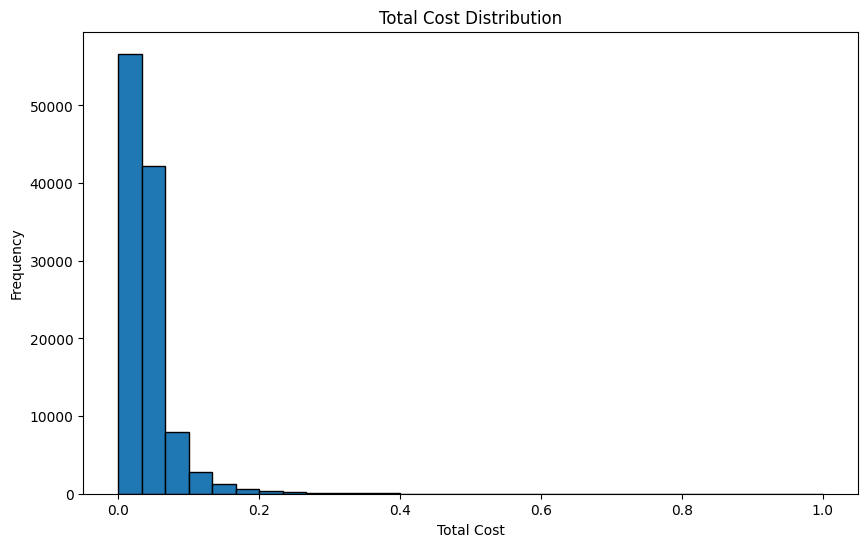

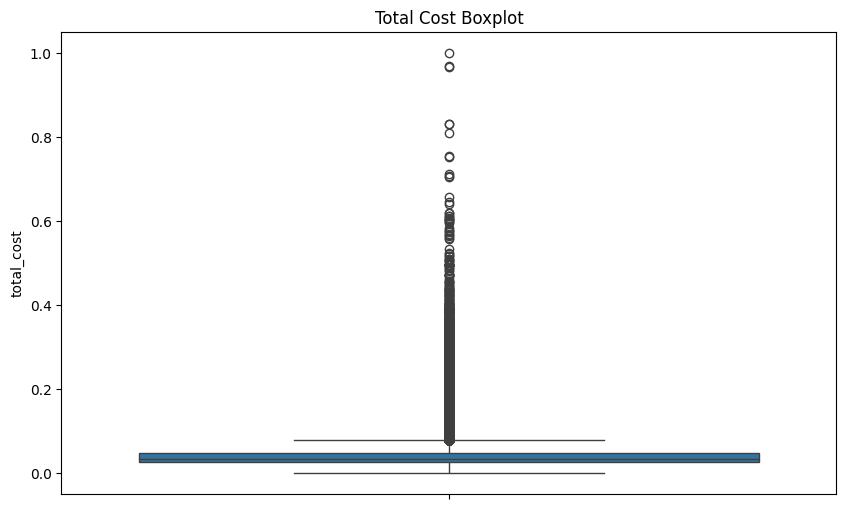

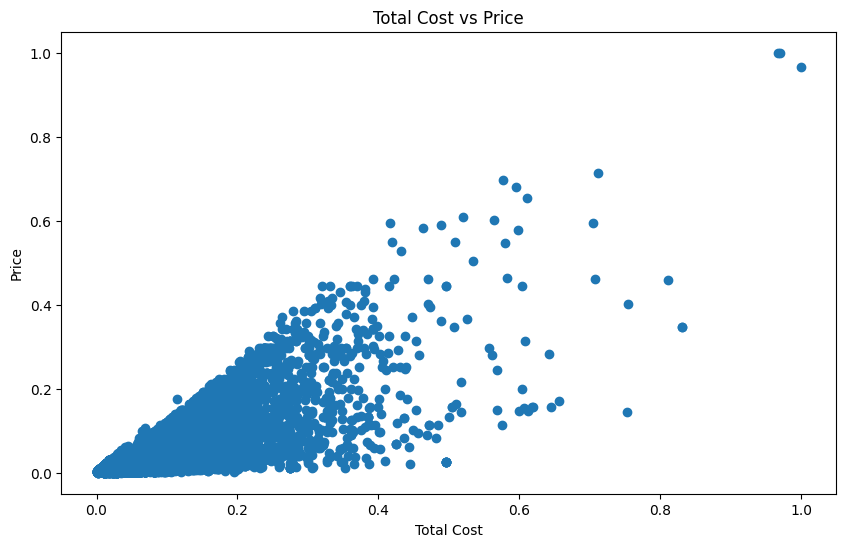

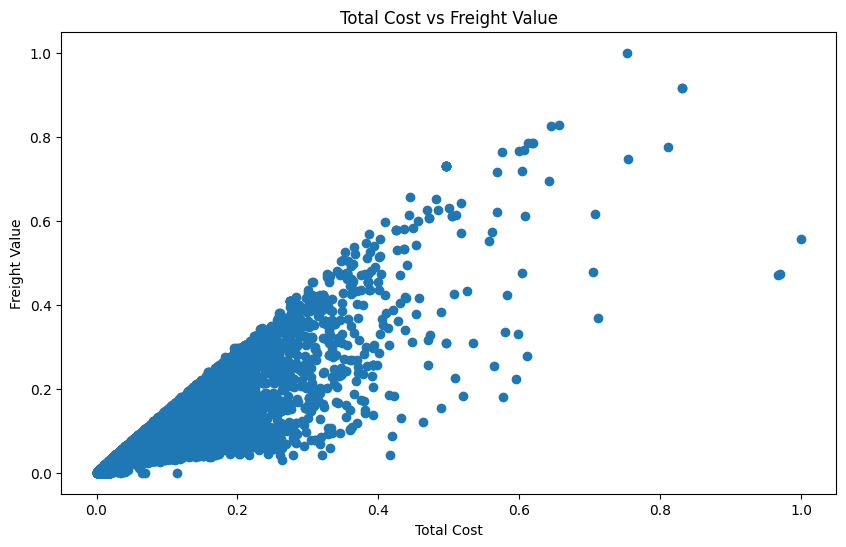

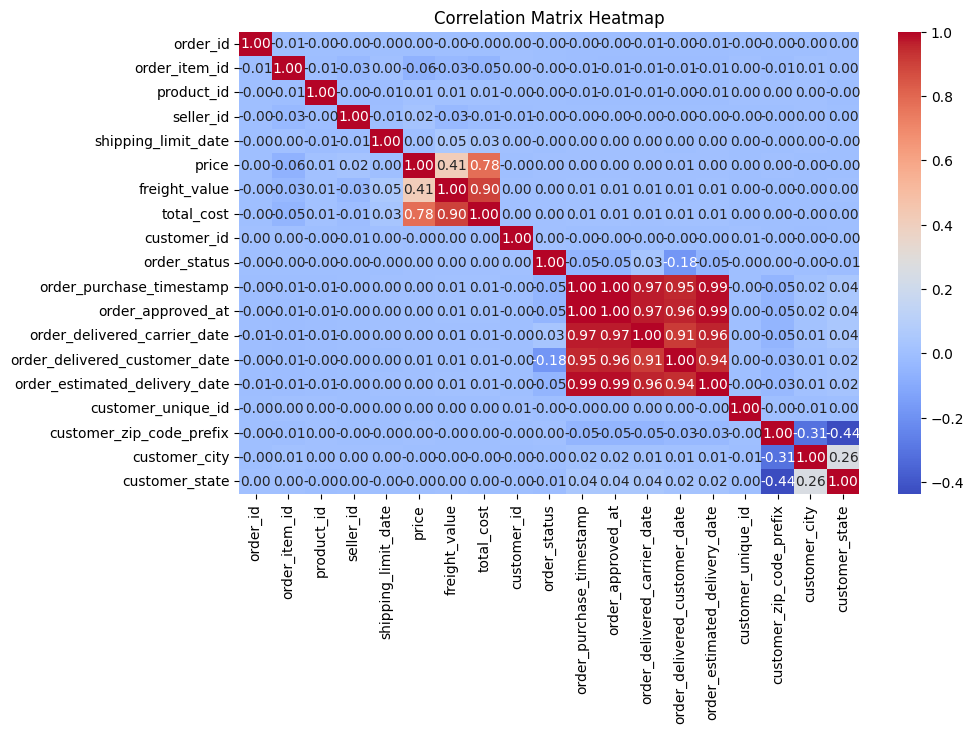

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_cost',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')


In [23]:
# Histogram for 'total_cost'
plt.figure(figsize=(10, 6))
plt.hist(final_df['total_cost'], bins=30, edgecolor='black')
plt.title('Total Cost Distribution')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'total_cost'
plt.figure(figsize=(10, 6))
sns.boxplot(final_df['total_cost'])
plt.title('Total Cost Boxplot')
plt.show()

# Scatter plot for 'total_cost' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(final_df['total_cost'], final_df['price'])
plt.title('Total Cost vs Price')
plt.xlabel('Total Cost')
plt.ylabel('Price')
plt.show()

# Scatter plot for 'total_cost' vs 'freight_value'
plt.figure(figsize=(10, 6))
plt.scatter(final_df['total_cost'], final_df['freight_value'])
plt.title('Total Cost vs Freight Value')
plt.xlabel('Total Cost')
plt.ylabel('Freight Value')
plt.show()

# Heatmap for the correlation matrix of the DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(final_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


print(final_df.columns)


In [31]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Check for missing values and impute them
missing_values = final_df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Impute missing values
for column in final_df.columns:
    if final_df[column].dtype == 'object':  # Categorical data
        final_df[column] = final_df[column].fillna(final_df[column].mode()[0])
    else:  # Numerical data
        final_df[column] = final_df[column].fillna(final_df[column].median())

# Confirm that there are no more missing values
print("\nMissing values after imputation:\n", final_df.isnull().sum())


# Data transformation
numerical_cols = final_df.select_dtypes(include=[np.number]).columns
final_df[numerical_cols] = final_df[numerical_cols].apply(zscore)

# Print the first 5 rows of the DataFrame to confirm transformations
print("\nFirst 5 rows after transformations:\n", final_df.head())


# Create user-item interaction matrix
interaction_matrix = final_df.pivot_table(index='customer_id', columns='product_id', values='order_item_id', fill_value=0, aggfunc='count')


# Print unique customer IDs
print(interaction_matrix.index.unique())



# Calculate item-item similarity matrix
item_similarity = cosine_similarity(interaction_matrix.T)
item_similarity = pd.DataFrame(item_similarity, index=interaction_matrix.columns, columns=interaction_matrix.columns)

# Function to get the most similar items
def get_similar_items(product_id, n=5):
    similar_items = item_similarity[product_id].sort_values(ascending=False)[:n+1]
    similar_items = similar_items.index[similar_items.index != product_id]  # Exclude the item itself
    return similar_items

# Function to recommend items for a user
def recommend_items(user_id, n=5):
    if user_id not in interaction_matrix.index:
        print(f"No data available for user ID: {user_id}")
        return []
    user_items = interaction_matrix.loc[user_id]
    not_interacted_items = user_items[user_items == 0].index
    item_scores = item_similarity[not_interacted_items].sum(axis=1)
    recommended_items = item_scores.nlargest(n)
    return recommended_items.index


# Get recommendations for a specific user
recommended_items = recommend_items(-1.9176302812675063)
print(f"Recommended items for user '-1.9176302812675063': {recommended_items}")



Missing values per column:
 order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_cost                       0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

Missing values after imputation:
 order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
total_cost    

/tmp/ipykernel_151494/273660071.py:31: PerformanceWarning: The following operation may generate 3251143366 cells in the resulting pandas object.
  interaction_matrix = final_df.pivot_table(index='customer_id', columns='product_id', values='order_item_id', fill_value=0, aggfunc='count')


MemoryError: Unable to allocate 24.2 GiB for an array with shape (98666, 32951) and data type float64